In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

churn = pd.read_csv("../Data/cleaned_ML.csv")
churn.drop(['Unnamed: 0'], axis=1, inplace=True)
less = churn[['Attrition_Flag','Total_Trans_Ct','Total_Revolving_Bal','Total_Relationship_Count','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Open_To_Buy','Customer_Age']]
less.head()

,Attrition_Flag,Total_Trans_Ct,Total_Revolving_Bal,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Open_To_Buy,Customer_Age
0,1,42,777,5,1.335,1144,1.625,11914.0,45
1,1,33,864,6,1.541,1291,3.714,7392.0,49
2,1,20,0,4,2.594,1887,2.333,3418.0,51
3,1,28,0,5,2.175,816,2.500,4716.0,40
4,1,24,1247,3,1.376,1088,0.846,2763.0,44


In [4]:

X = less.drop('Attrition_Flag',axis=1)
y = less['Attrition_Flag']

<Axes: ylabel='Attrition_Flag'>

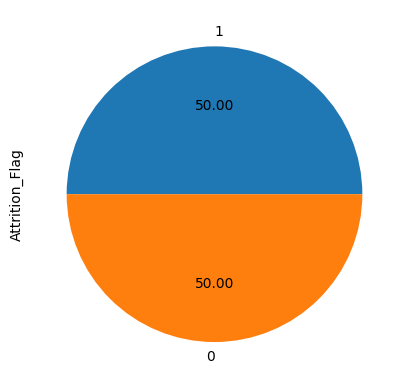

In [5]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy="not minority")
ros = RandomOverSampler(sampling_strategy="not majority")
X_ros, y_ros = ros.fit_resample(X,y)
X_rus, y_rus = rus.fit_resample(X,y)

y_ros.value_counts().plot.pie(autopct='%.2f')


In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
#test of different classifier algorithms
classifier = [
    KNeighborsClassifier(5),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=6),
    SVC(gamma=2, C=1)
]
DecisionTreeClassifier(max_depth=6).get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [7]:
#with Over sampling 
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=0)

for model in classifier:
    y_pred = model.fit(X_train, y_train).predict(X_test)
    number = X_test.shape[0]
    test = (y_test != y_pred).sum()
    score = model.score(X_test, y_test)
    print(f"the {model} has a score of {score}")


the KNeighborsClassifier() has a score of 0.8887399463806971
the GaussianNB() has a score of 0.7694369973190348
the DecisionTreeClassifier(max_depth=6) has a score of 0.9423592493297587
the SVC(C=1, gamma=2) has a score of 0.989946380697051


In [8]:
#With Under Sampling 
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, random_state=0)

for model in classifier:
    y_pred = model.fit(X_train, y_train).predict(X_test)
    number = X_test.shape[0]
    score = model.score(X_test, y_test)
    print(f"the {model} has a score of {score}")
    

the KNeighborsClassifier() has a score of 0.8456014362657092
the GaussianNB() has a score of 0.7630161579892281
the DecisionTreeClassifier(max_depth=6) has a score of 0.9245960502692998
the SVC(C=1, gamma=2) has a score of 0.4865350089766607


In [9]:

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=0)


dtc = DecisionTreeClassifier(random_state=42)

param_grid = { 
    'max_features': ['sqrt', 'log2',None],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
}

dtc = RandomizedSearchCV(dtc,
                  param_grid,
                  cv=5,
                  n_iter=20,
                  random_state=42,
)

dtc.fit(X_train,y_train)
print(dtc.best_params_)
print(dtc.best_score_)

{'max_features': None, 'max_depth': 7, 'criterion': 'gini'}
0.9372209901150695


In [10]:

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=0)


dtc = DecisionTreeClassifier(random_state=45, max_depth=7,criterion='gini', max_features=None)
dtc.fit(X_train,y_train)
score = model.score(X_test, y_test)
print(score)




0.8703083109919572


0.9477211796246648


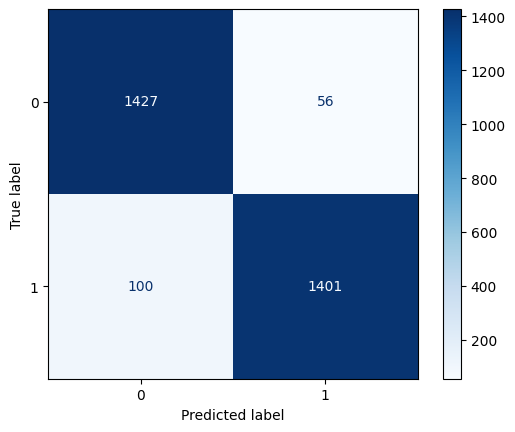

In [11]:
# with standard scaler 
X_train,X_test, y_train, y_test = train_test_split(X_ros,y_ros,random_state=15)

steps=[("scale", StandardScaler()),
       ("model", DecisionTreeClassifier(random_state=45, max_depth=7,criterion='gini', max_features=None))]

pipe = Pipeline(steps)
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(pipe.score(X_test,y_test))
disp = ConfusionMatrixDisplay.from_estimator(
        pipe,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# 0 = attrited customer, 1 = Existing customer 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1483
           1       0.96      0.93      0.95      1501

    accuracy                           0.95      2984
   macro avg       0.95      0.95      0.95      2984
weighted avg       0.95      0.95      0.95      2984



<Axes: >

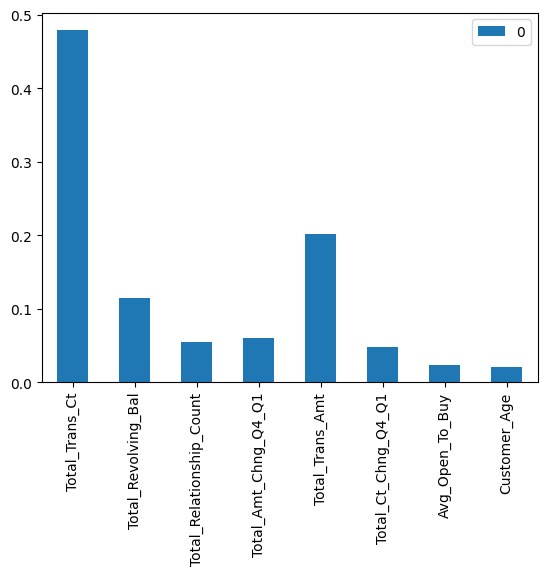

In [13]:
features_names = X.columns
feature_importance = pd.DataFrame(pipe.steps[1][1].feature_importances_,index = features_names)
#features = list(feature_importance[[0]>0].index)
feature_importance.plot(kind='bar')